### import packages

In [1]:
import scanpy as sc 
from SpaJoint.SpaJoint import SpaJoint
import pandas as pd
import numpy as np

c:\Users\18813\anaconda3\envs\SpaJoint\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\18813\anaconda3\envs\SpaJoint\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\18813\anaconda3\envs\SpaJoint\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\18813\anaconda3\envs\SpaJoint\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### import data

In [2]:
dataset = "human_breast_cancer"
ref_adata = sc.read("./data/" + dataset + "/scRNA.h5ad")
inf_adata = sc.read("./data/" + dataset + "/ST.h5ad")
save_dir = "./data/" + dataset
print(ref_adata.shape)
print(inf_adata.shape)

(6178, 29733)
(4784, 28402)


### Add spatial coordinates to ST data

In [3]:
inf_adata.obsm['spatial'] = np.array(inf_adata.obs[['x','y']])

### Convert cell type labels to numeric codes

In [4]:
ref_adata.obs["CellType"] = ref_adata.obs["cell_type"].copy()
ref_adata.obs["CellType"] = ref_adata.obs["CellType"].astype("category")
ref_adata.obs["celltype"]=ref_adata.obs["CellType"].astype("category").cat.codes 

### Run the algorithm

In [5]:
spajoint = SpaJoint(ref_ds=ref_adata,inf_ds=inf_adata,save_dir=save_dir)
spajoint.PrepareDataLoader_stage()
spajoint.BuildNet_stage()
spajoint.TrainingProcessStage()

c:\Users\18813\anaconda3\envs\SpaJoint\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
c:\Users\18813\anaconda3\envs\SpaJoint\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Number of overlap genes: 313


d:\scJoint_loc\code_github\SpaJoint\utils.py:215: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["overlap_genes"] = genes
d:\scJoint_loc\code_github\SpaJoint\utils.py:216: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata_sc.uns["overlap_genes"] = genes
2025-04-16 13:31:56,389 - root - INFO - Create log file....
2025-04-16 13:31:56,391 - root - INFO - Create SpaJoint Object Done....


num_workers: 0
Epoch: 0
rna_reduction_loss = 4.1781005859375,st_reduction_loss=4.478623390197754,sim_loss=0.692470371723175,loc_loss=5.245074963904065.
encoder_loss = 3.5075382662488304,cell_loss=2.1261420249938965.
rna_reduction_loss = 4.297914981842041,st_reduction_loss=4.451635837554932,sim_loss=0.6888595819473267,loc_loss=5.267624657881939.
encoder_loss = 3.540618618633883,cell_loss=2.131284475326538.
rna_reduction_loss = 4.390744209289551,st_reduction_loss=4.5493083000183105,sim_loss=0.6791072487831116,loc_loss=5.251594772042463.
encoder_loss = 3.5965135077837367,cell_loss=2.0604708194732666.
rna_reduction_loss = 4.28449821472168,st_reduction_loss=4.44408655166626,sim_loss=0.6844332814216614,loc_loss=5.280369084654958.
encoder_loss = 3.5377627932188336,cell_loss=1.9694079160690308.
rna_reduction_loss = 4.208600997924805,st_reduction_loss=4.4549078941345215,sim_loss=0.6767922043800354,loc_loss=5.246877245449178.
encoder_loss = 3.5130700215385664,cell_loss=1.872064232826233.
rna_red

In [6]:
celltype_density = pd.DataFrame(spajoint.inf_ds.obsm["cell_pred"])
cell_type_dict = dict(zip(ref_adata.obs['celltype'],ref_adata.obs['CellType']))
celltype_density.rename(columns=cell_type_dict,inplace=True)
celltype_density.index = inf_adata.obs.index
celltype_density.to_csv(save_dir +'/spajoint_result.txt')

### deconvolution result with dimension spot * cell type

In [7]:
celltype_density.head()

,B-cells,CAFs,Endothelial,Myeloid,Normal Epithelial,PVL,T-cells
TACCGATCCAACACTT-1,0.297699,0.102029,0.139806,0.148088,0.119265,0.060954,0.132159
GATAAGGGACGATTAG-1,0.048559,0.021906,0.219431,0.016949,0.626930,0.061295,0.004930
TGTTGGCTGGCGGAAG-1,0.315020,0.069527,0.216258,0.085652,0.248808,0.054077,0.010658
GCGAGGGACTGCTAGA-1,0.256966,0.092864,0.149554,0.095778,0.307036,0.080947,0.016855
GCGCGTTTAAATCGTA-1,0.123067,0.108874,0.189212,0.125512,0.369576,0.081694,0.002065


###  reproduce part of Fig 5B described in the manuscript

In [10]:
inf_adata.obs['B-cells'] = np.array(celltype_density[['B-cells']])
inf_adata.obs['CAFs'] = np.array(celltype_density[['CAFs']])
inf_adata.obs['Endothelial'] = np.array(celltype_density[['Endothelial']])
inf_adata.obs['Myeloid'] = np.array(celltype_density[['Myeloid']])
inf_adata.obs['Normal Epithelial'] = np.array(celltype_density[['Normal Epithelial']])
inf_adata.obs['PVL'] = np.array(celltype_density[['PVL']])

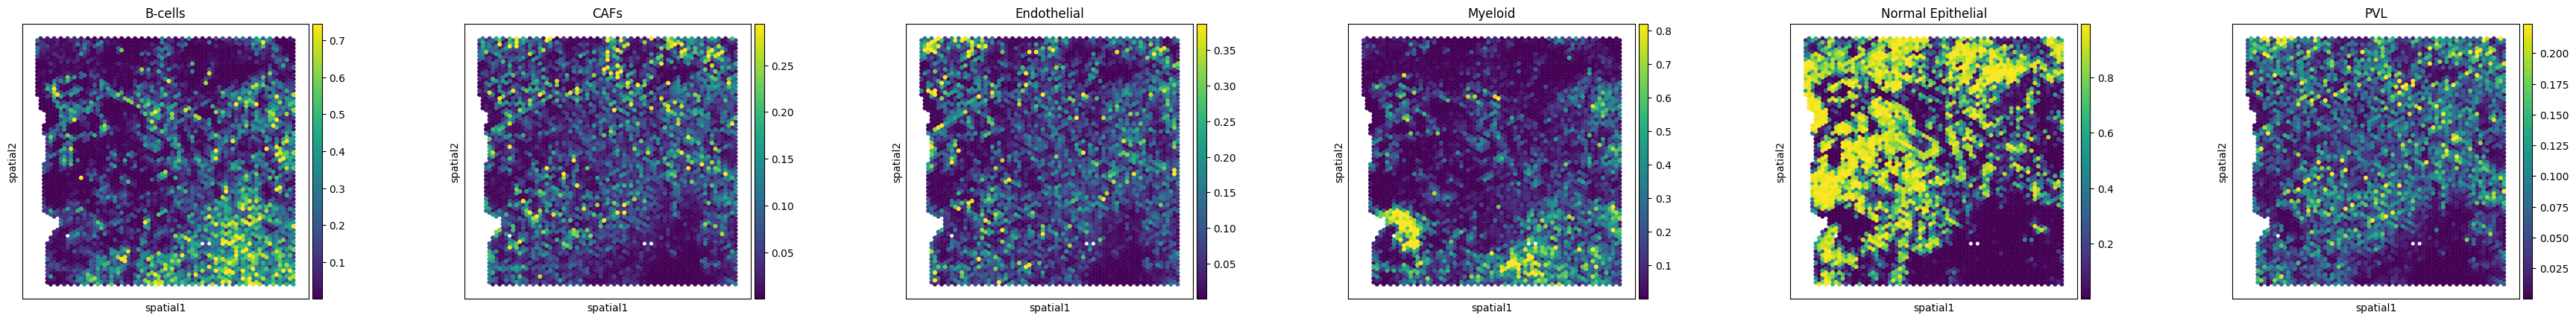

In [11]:
sc.pl.spatial(inf_adata,img_key="hires",color=['B-cells','CAFs','Endothelial','Myeloid','Normal Epithelial','PVL'],spot_size=125,vmax='p99',ncols=6)